# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

## Imports

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

## Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Load Data

In [3]:
filename = './data/Wholesale_Data.csv'
df = pd.read_csv(filename)
print(f'Data shape: {df.shape}')
df.head()

Data shape: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Check for Missing/Incorrect Data

I'll start the EDA by looking for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isna().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

It doesn't look as if there are any missing values.

Next, I'll check for incorrect values.

The features Channel and Region appear to be nominal.

In [6]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [7]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [8]:
nominal_features = ['Channel', 'Region']

The remaining features are in monetary units (m.u.) and so should probably be non-negative.

In [9]:
numerical_features = df.columns.to_list()
for nm in nominal_features:
    numerical_features.remove(nm)
numerical_features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [10]:
df[df[numerical_features] < 0].any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

It seems as if all numerical features are indeed non-negative. We can confirm this another way with `df.describe()`.

### Describe the Data

Using `df.describe()`, I can quickly compute the mean, median, and standard deviation of each numerical feature.

In [11]:
df[numerical_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Visualize the Data

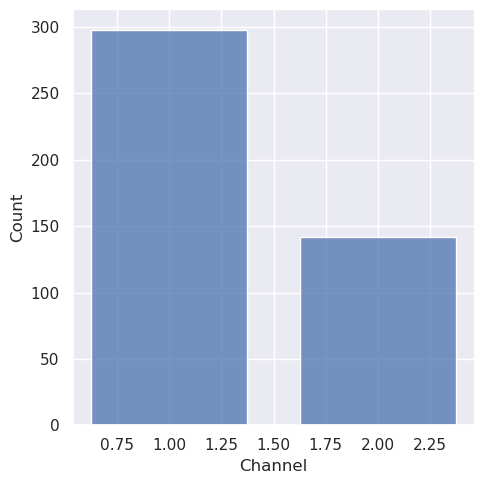

In [31]:
sns.displot(df, x='Channel', discrete=True, shrink=0.75)

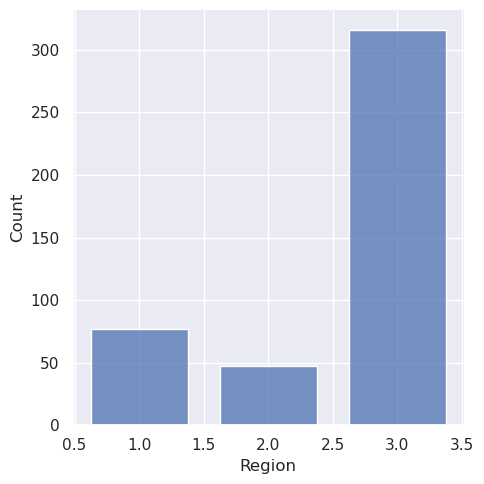

In [14]:
sns.displot(df, x='Region', discrete=True, shrink=0.75)

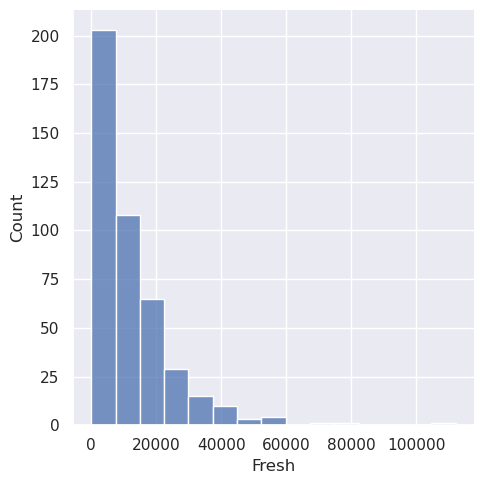

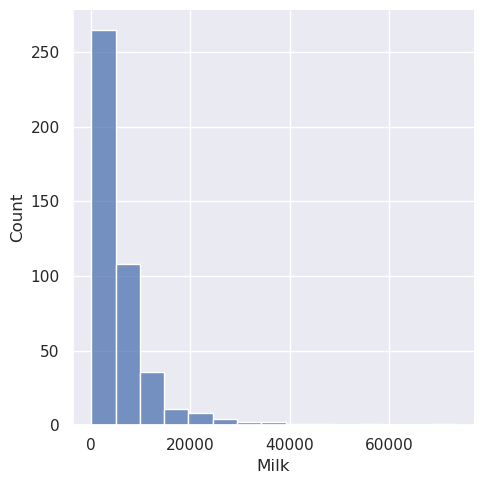

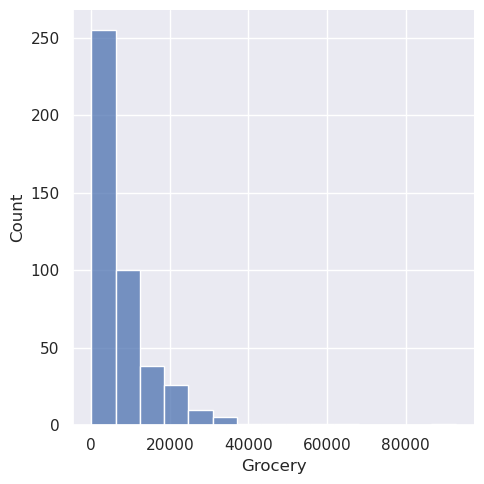

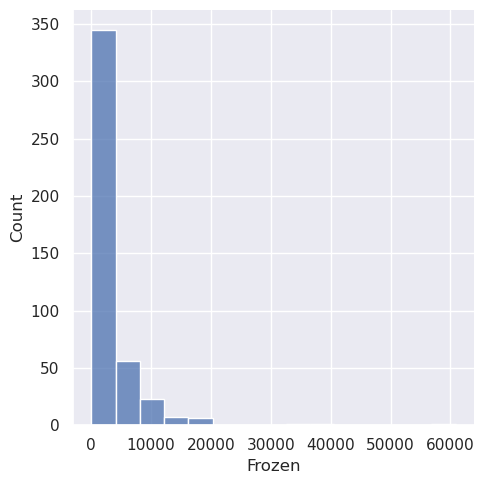

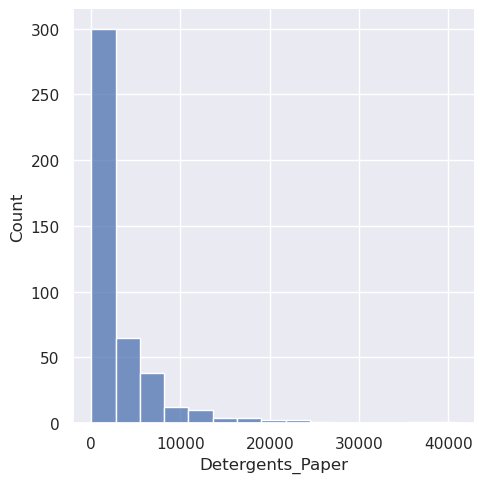

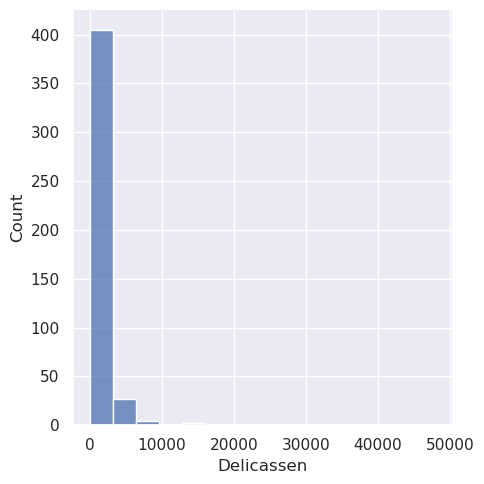

In [19]:
for nf in numerical_features:
    sns.displot(df, x=nf, bins=15)

Given the extent of the horizontal axes in the above figures, it looks like there are some outliers. To confirm this suspicion, I'll generate some box plots.

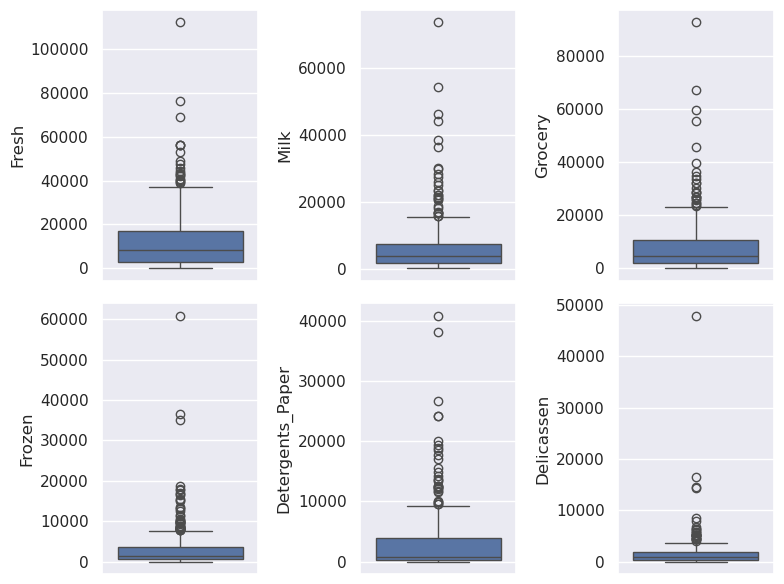

In [43]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 6))
for nf in numerical_features:
    idx = numerical_features.index(nf)
    row = idx // ncols
    col = idx % ncols
    sns.boxplot(df, y=nf, ax=axes[row, col])
fig.tight_layout()

As there is no evidence that the outliers are erroneous, there's no good reason to drop them. Rather, I'll deal with them through an appropriate scaler such as `RobustScaler()` or `QuantileTransformer()`.

Next, I'll look at various scatter plots to see if there are any sign of clustering.

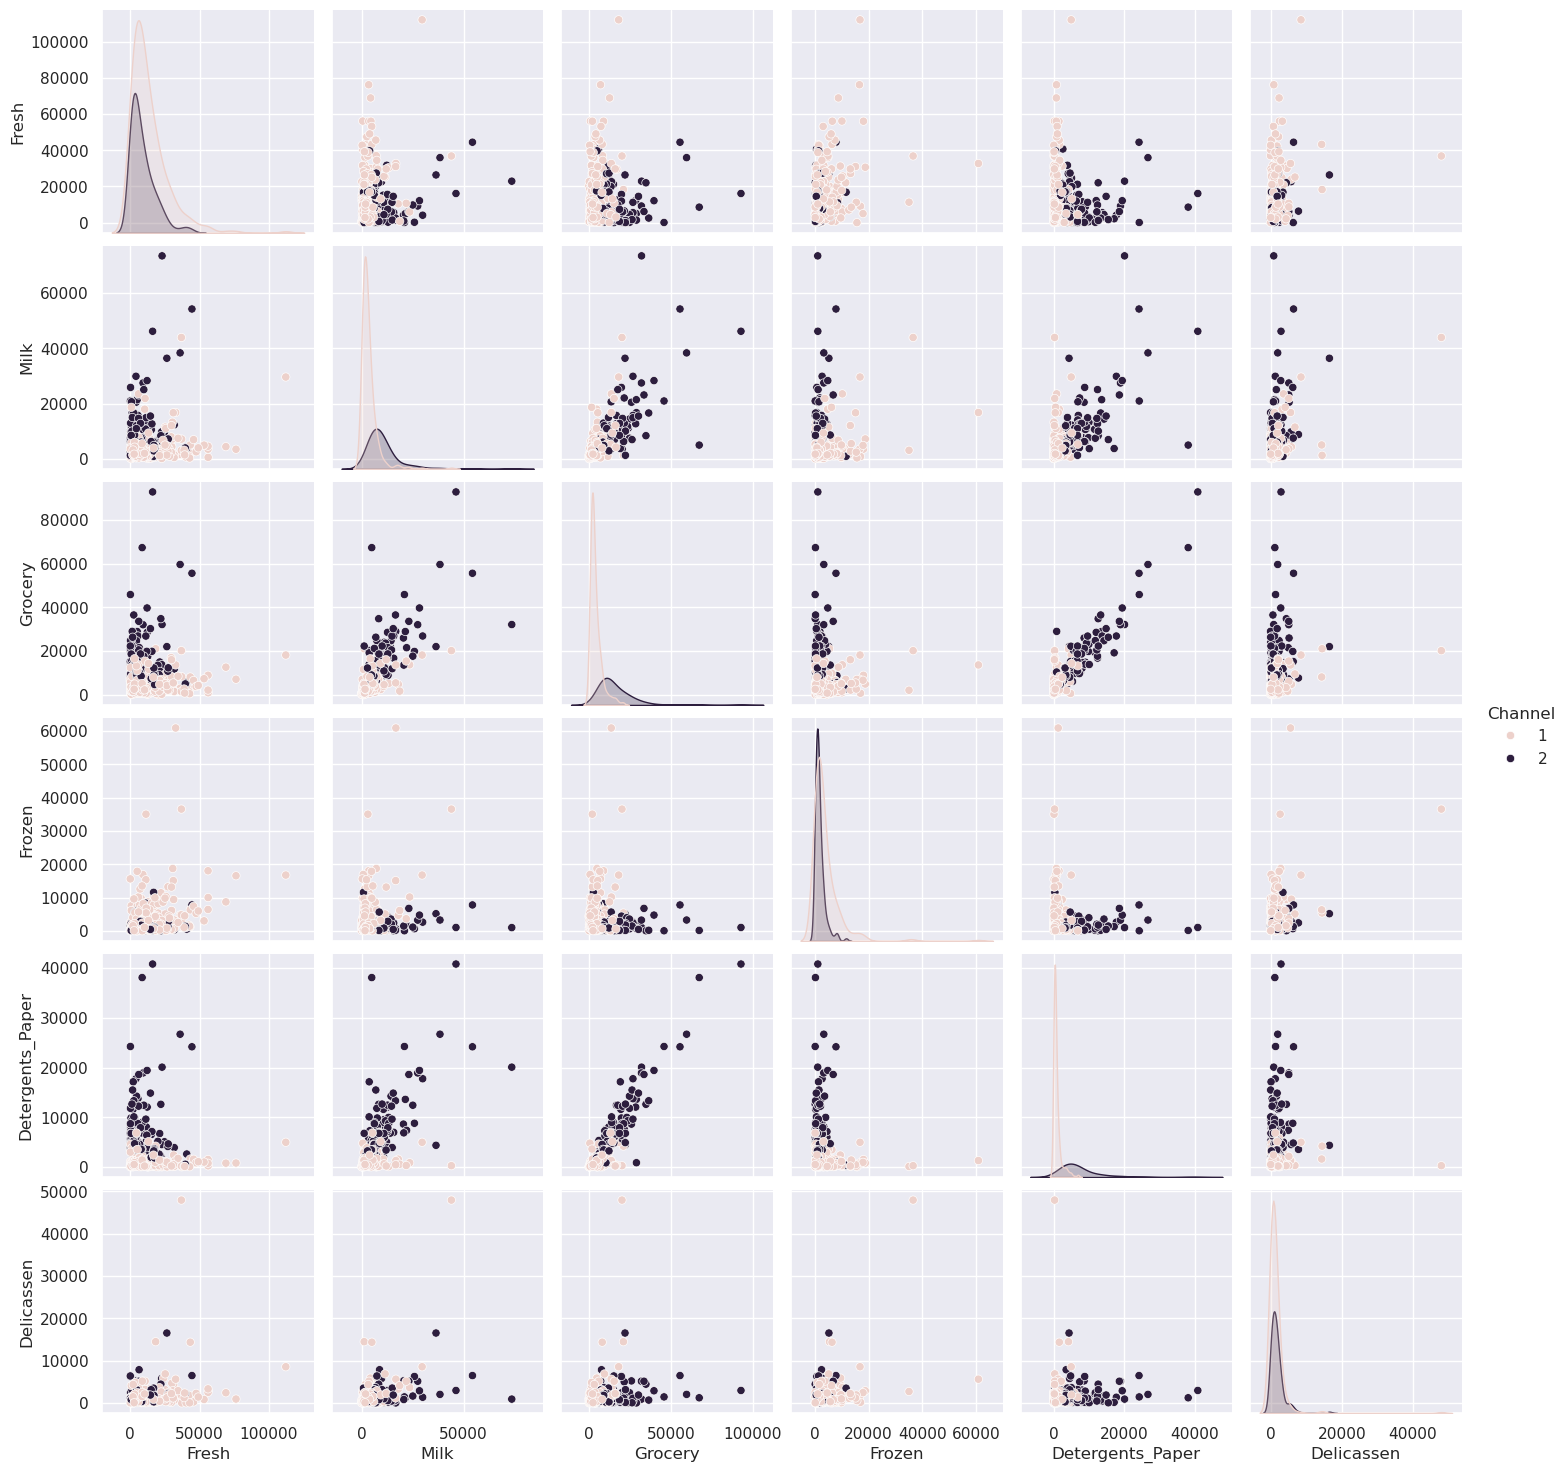

In [51]:
features = ['Channel'] + numerical_features
sns.pairplot(df[features], hue='Channel')

From the above scatter plots, there does appear to be clustering with respect to Channle. 

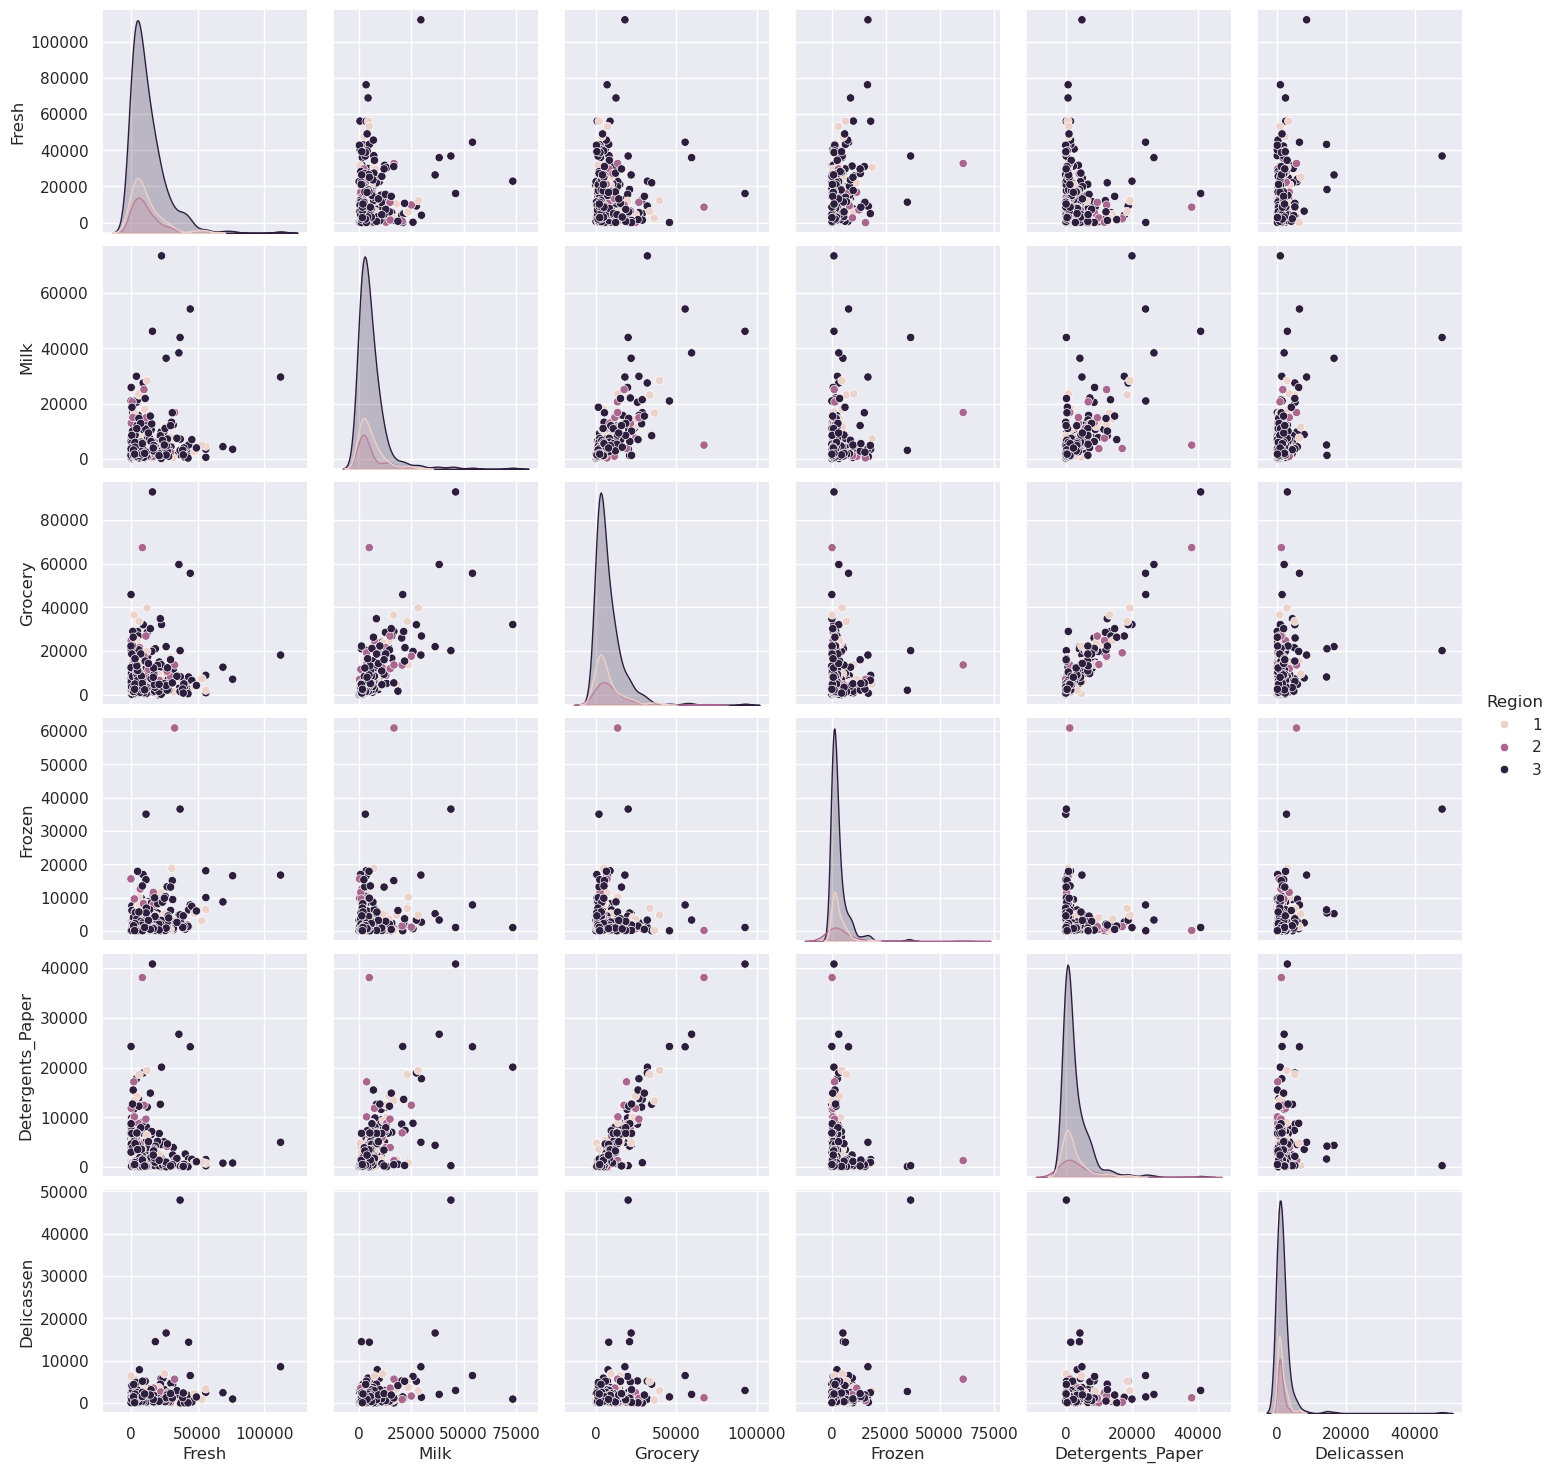

In [50]:
features = ['Region'] + numerical_features
sns.pairplot(df[features], hue='Region')

From the above plots, it is not at all clear that there is clustering with respect to Region.

I'll construct a heat map of the data's correlation matrix.

<Axes: >

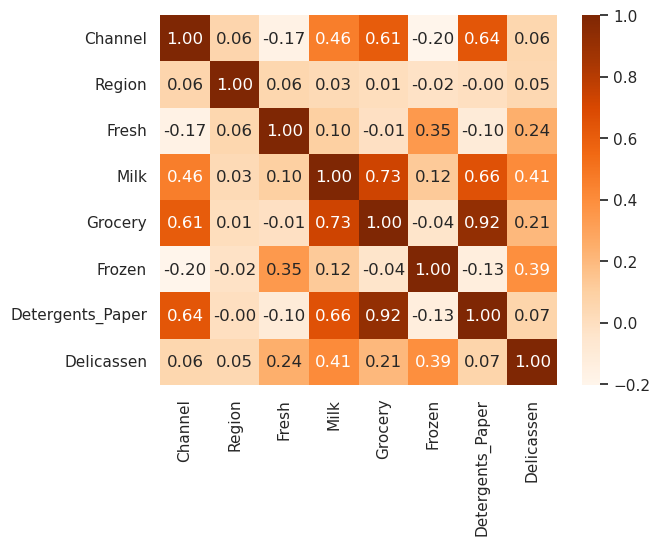

In [55]:
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')

The above heat map provides additional support for our observations that there seems to be evidence of clustering with respect to Channel, but not Region.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, QuantileTransformer, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

Essentially by trial and error, I'll try to find a set of features that leads to decent clustering.

In [220]:
nominal_keepers = nominal_features.copy()
numerical_keepers = numerical_features.copy()

nominal_keepers.remove('Region')

numerical_keepers.remove('Fresh')
numerical_keepers.remove('Frozen')
# numerical_keepers.remove('Delicassen')
# numerical_keepers.remove('Milk')
# numerical_keepers.remove('Grocery')
# numerical_keepers.remove('Detergents_Paper')

print(f'Nominal features to keep: {nominal_keepers}') 
print(f'Numerical features to keep: {numerical_keepers}')

Nominal features to keep: ['Channel']
Numerical features to keep: ['Milk', 'Grocery', 'Detergents_Paper', 'Delicassen']


In [221]:
# Instantiate scalers. Only one will be used for the numerical data.
rs = RobustScaler()
qt = QuantileTransformer(
    output_distribution='normal',
    n_quantiles = 100
)

kmc = KMeans(n_init='auto')

# Encode the nominal features and scale the numerical features.
column_transformer = ColumnTransformer(transformers=[
    ('encode', OneHotEncoder(), nominal_features),
    # ('scale', rs , numerical_features)
    ('scale', qt , numerical_features)
],
    remainder='drop'
)

pipe = Pipeline(steps=[
    ('column_transform', column_transformer),
    ('cluster', kmc)
])

Text(0, 0.5, 'Inertia')

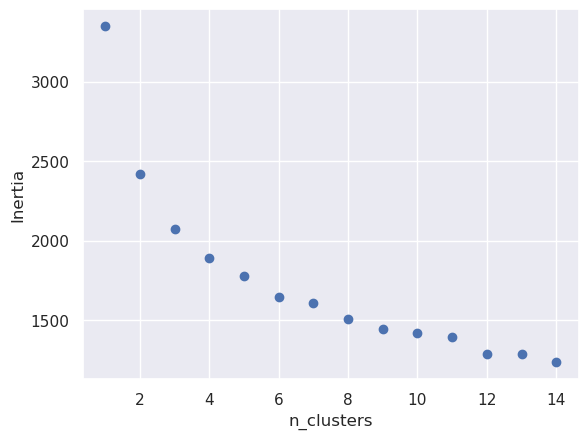

In [222]:
# Loop over possible value for n_clusters, keeping track of inertias.
n_clusters_opts = np.arange(1, 15).tolist()
inertias = []
for n in n_clusters_opts:
    pipe.set_params(cluster__n_clusters=n)
    pipe.fit(df)
    pipe.predict(df)
    inertias.append(pipe['cluster'].inertia_)

# Plot Inerta vs n_clusters.
fig, ax = plt.subplots()
ax.scatter(n_clusters_opts, inertias)
ax.set_xlabel('n_clusters')
ax.set_ylabel('Inertia')

The above plot of inertia vs n_clusters never seems to develop the characteristic elbow that would indicate an optimal choice for the parameter n_clusters. I've tried using each of `RobustScaler` and `QuantileTransformer`, and I've tried many, many different collections of features to include in the clustering. Qualitatively, the resulting inertia vs n_clusters plot always looks like that depicted above. Hence, using `KMeans`, I have found no strong evidence for well-separated clusters.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.